##ROLL NO- B22ES007

#QUESTION 1

In [ ]:
#importing the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC

In [ ]:
#Loading the Dataset
from sklearn import datasets
iris = datasets.load_iris(as_frame=True)

In [ ]:
iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Creating the Dataframe with needed columns

In [ ]:
#creating the dataframe
columns = ['petal length (cm)','petal width (cm)']
df = iris.data[columns]

In [ ]:
df['target']= iris.target
df = df.loc[(df['target']==0) | (df['target']==1)]

<ipython-input-8-26e7784a2d93>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target']= iris.target


In [ ]:
x_unscaled = df.drop(columns='target')
y = df['target']


**Implementing Linear SVC**

In [ ]:
lin = LinearSVC()
lin.fit(x_unscaled,y)
coef = lin.coef_
inter = lin.intercept_

**Decision Boundary Plot(Unscaled)**

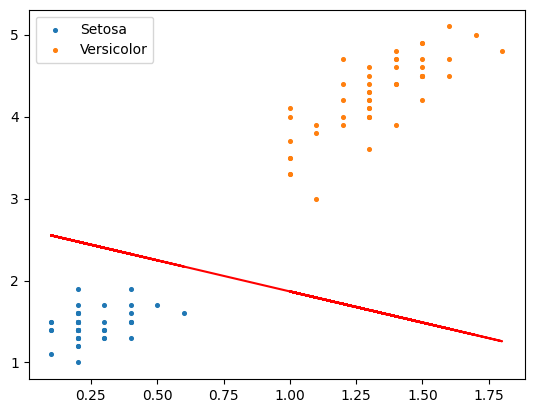

In [ ]:

a = df.loc[df['target'] == 0]
b = df.loc[df['target'] == 1]
plt.scatter(a['petal width (cm)'],a['petal length (cm)'], label='Setosa',s=7)
plt.scatter(b['petal width (cm)'],b['petal length (cm)'], label = 'Versicolor', s=7)
plt.legend()
plt.plot(x_unscaled['petal width (cm)'],-((coef[0][0]*x_unscaled['petal width (cm)'])+inter)/coef[0][1], c='r')

**Scaling Using Standard Scaler**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_unscaled)
x_scaled = scaler.transform(x_unscaled)

Decision Boundary plot(Scaled)

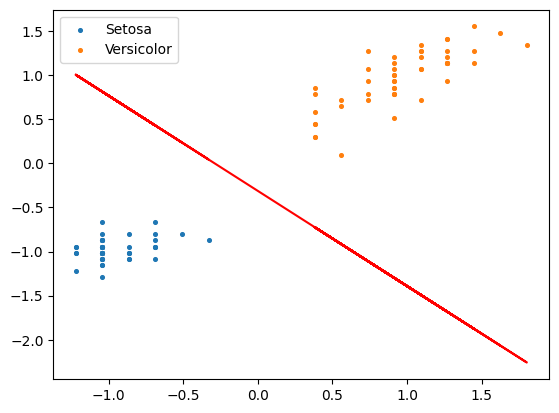

In [ ]:
df_2 = df
df_2[columns] = x_scaled
lin.fit(x_scaled,y)
coef_2 = lin.coef_
inter_2 = lin.intercept_
a = df_2.loc[df['target'] == 0]
b = df_2.loc[df['target'] == 1]
plt.scatter(a['petal width (cm)'],a['petal length (cm)'], label='Setosa', s=7)
plt.scatter(b['petal width (cm)'],b['petal length (cm)'], label = 'Versicolor',s=7)
plt.legend()
plt.plot(df_2['petal width (cm)'],-((coef_2[0][0]*df_2['petal width (cm)'])+inter_2)/coef_2[0][1], c='r')

# Performing Grid Search

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
p = {
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['rbf']}
grid = GridSearchCV(SVC(),p,refit=True,verbose=3,error_score='raise')
grid.fit(x_scaled,y)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(error_score='raise', estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
#getting the best parameters
print(grid.best_params_)
print(grid.best_estimator_)


{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=0.1, gamma=1)


decision boundary plotting function



In [ ]:
#referred to sample code https://scikit-learn.org/stable/auto_examples/svm/plot_linearsvc_support_vectors.html
from sklearn.inspection import DecisionBoundaryDisplay

def svm_boundary_plotter(x_set, y_set, n, h, w, c=None, g=None, k=None):
    plt.figure(figsize=(5*w, 5*h))

    if k == None: k = ['linear']*n

    k = k*int(n/len(k))

    for i, c, g, k  in zip(range(n), c, g, k):
        clf = SVC(kernel = 'linear', C=c, gamma=g).fit(x_set, y_set)
        decision_function = clf.decision_function(x_set)

        support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-8)[0]
        support_vectors = x_set[support_vector_indices]

        plt.subplot(h, w, i + 1)

        plt.scatter(x_set[:, 0], x_set[:, 1], c=y_set, s=35, cmap=plt.cm.coolwarm)
        ax = plt.gca()

        DecisionBoundaryDisplay.from_estimator(clf, x_set, ax=ax, grid_resolution=50, plot_method="contour", colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"])

        plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, linewidth=1, facecolors="none", edgecolors="k")
        plt.title("Kernel: " + k + ", C = " + str(c) + ", g = " + str(g))

    plt.tight_layout()
    plt.show()

**Plotting Decision Boundary**

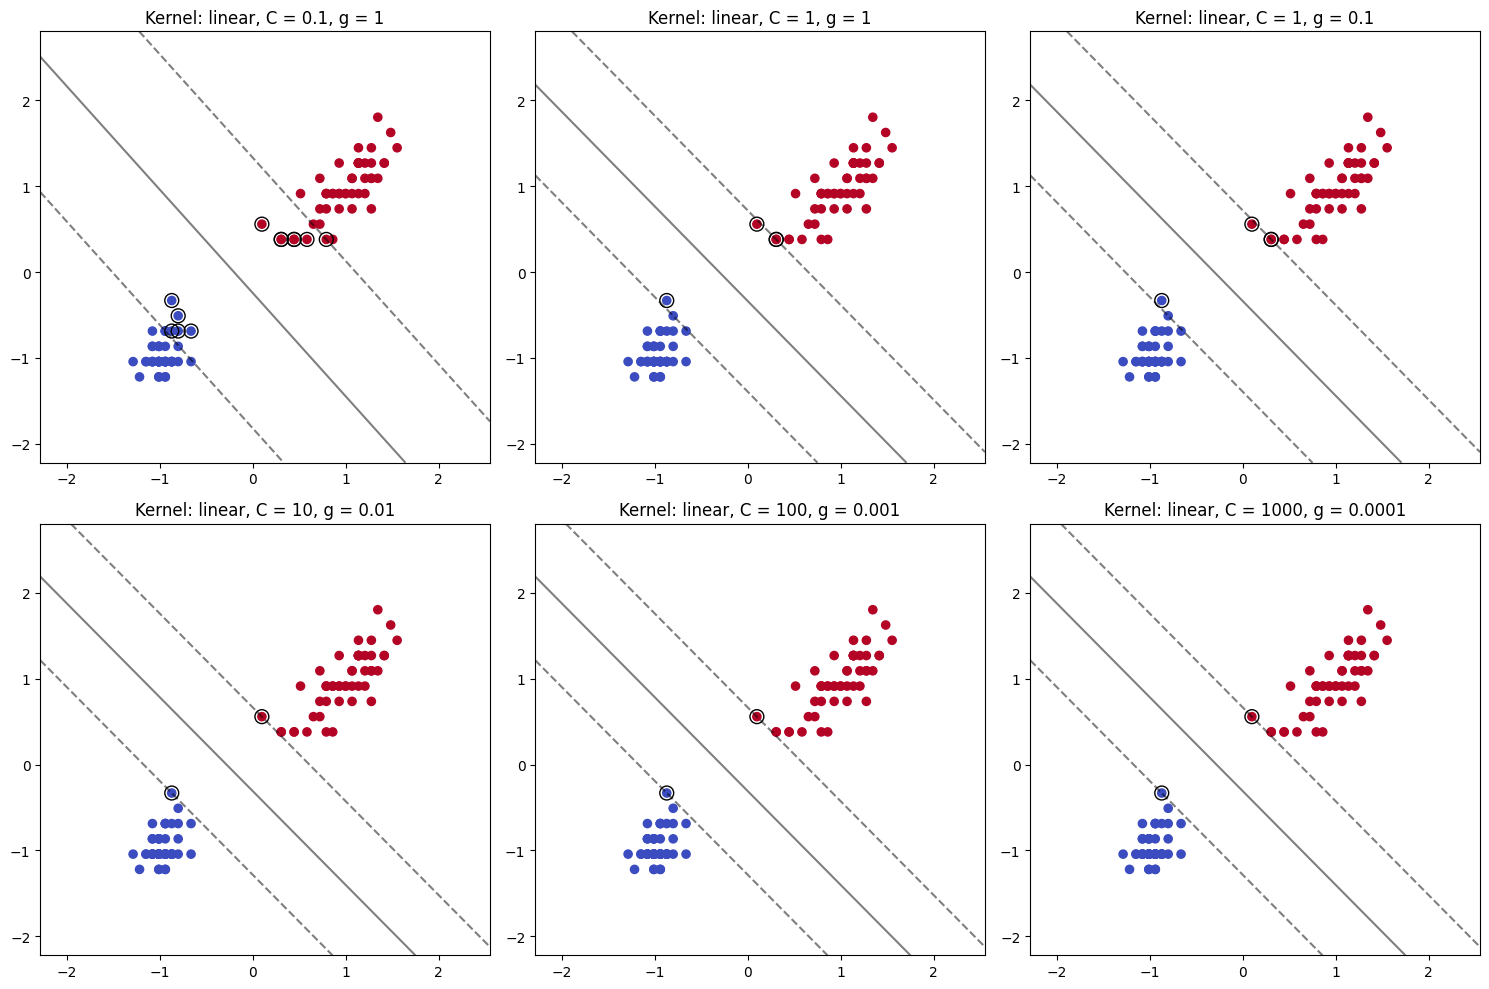

In [ ]:
svm_boundary_plotter(x_scaled,y,6,2,3,[0.1,1,1,10,100,1000],[1,1,0.1,0.01,0.001,0.0001])

#rbf Kernel

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

def svm_boundary_plotter(x_set, y_set, n, h, w, c=None, g=None, k=None):
    plt.figure(figsize=(5*w, 5*h))



    k = k*int(n/len(k))

    for i, c, g, k  in zip(range(n), c, g, k):
        clf = SVC(kernel = k, C=c, gamma=g).fit(x_set, y_set)
        decision_function = clf.decision_function(x_set)

        support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-8)[0]
        support_vectors = x_set[support_vector_indices]

        plt.subplot(h, w, i + 1)

        plt.scatter(x_set[:, 0], x_set[:, 1], c=y_set, s=35, cmap=plt.cm.coolwarm)
        ax = plt.gca()

        DecisionBoundaryDisplay.from_estimator(clf, x_set, ax=ax, grid_resolution=50, plot_method="contour", colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"])

        plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, linewidth=1, facecolors="none", edgecolors="k")
        plt.title("Kernel: " + k + ", C = " + str(c) + ", g = " + str(g))

    plt.tight_layout()
    plt.show()

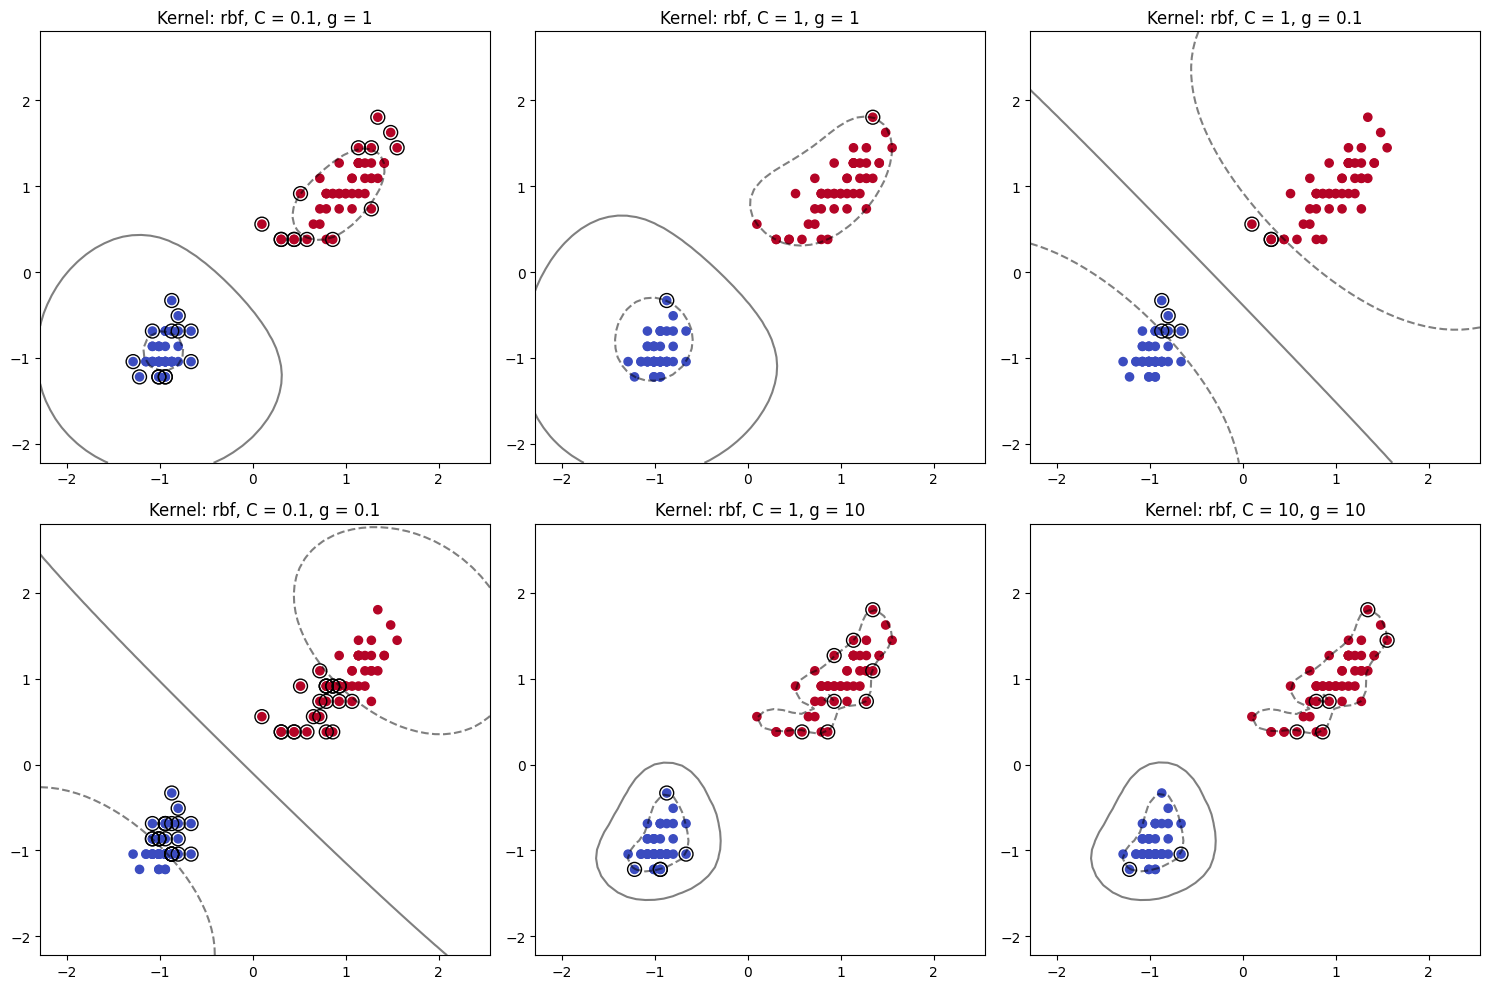

In [ ]:
svm_boundary_plotter(x_scaled,y,6,2,3,[0.1,1,1,0.1,1,10],[1,1,0.1,0.1,10,10],k=['rbf'])


#Question 2

In [ ]:
#importing the dataset
from sklearn.datasets import make_moons
x_df, y_df= datasets.make_moons(n_samples=200, noise=0.20, random_state=69)


In [ ]:

from sklearn.inspection import DecisionBoundaryDisplay

def svm_boundary_plotter(x_set, y_set, n, h, w, c=None, g=None, k=None):
    plt.figure(figsize=(5*w, 5*h))


    k = k*int(n/len(k))

    for i, c, g, k  in zip(range(n), c, g, k):
        clf = SVC(kernel = k, C=c, gamma=g).fit(x_set, y_set)
        decision_function = clf.decision_function(x_set)

        support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-8)[0]
        support_vectors = x_set[support_vector_indices]

        plt.subplot(h, w, i + 1)

        plt.scatter(x_set[:, 0], x_set[:, 1], c=y_set, s=25, cmap=plt.cm.coolwarm)
        ax = plt.gca()

        DecisionBoundaryDisplay.from_estimator(clf, x_set, ax=ax, grid_resolution=50, plot_method="contour", colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"])

        plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, linewidth=1, facecolors="none", edgecolors="k")
        plt.title("Kernel: " + k + ", C = " + str(c) + ", g = " + str(g))

    plt.tight_layout()
    plt.show()

Plotting for various Kernels

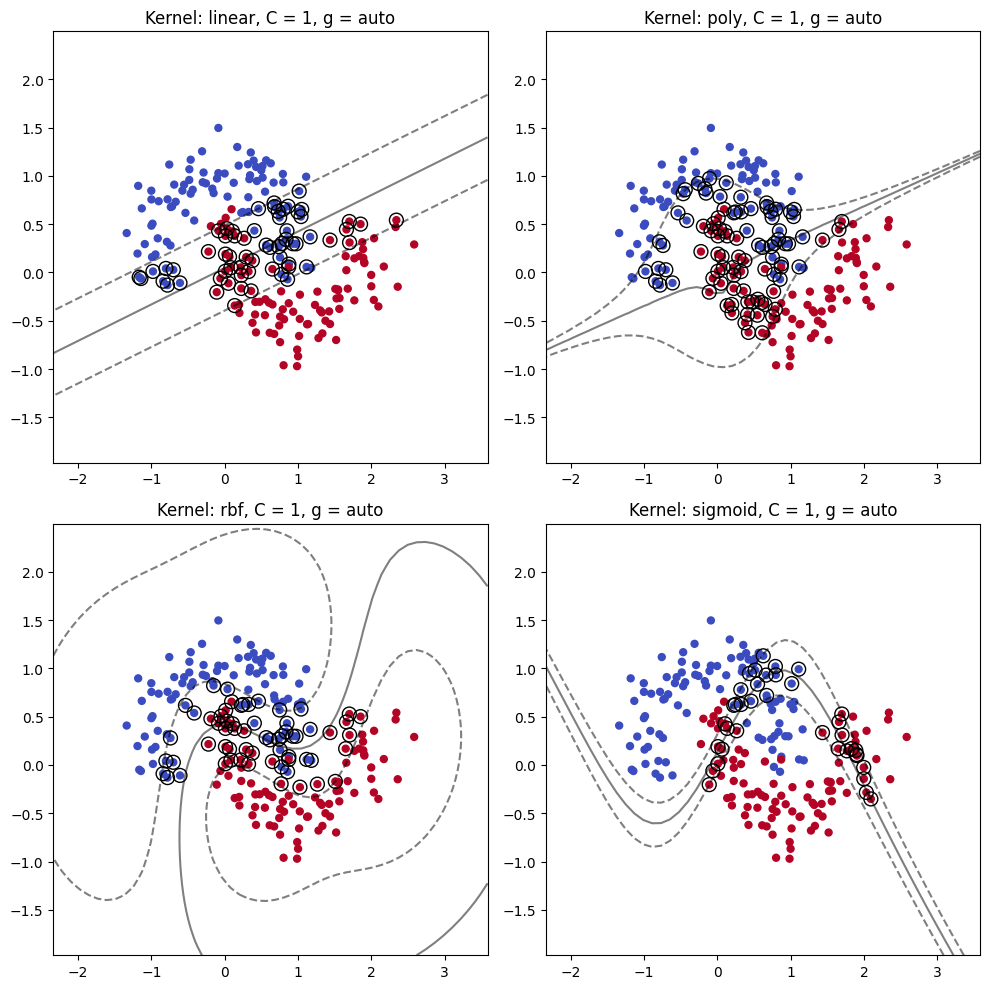

In [ ]:
k= ['linear', 'poly', 'rbf', 'sigmoid']
svm_boundary_plotter(x_df,y_df,4,2,2,[1]*4,g=['auto']*4,k=k)

classification report

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=20)
model = SVC(kernel = 'rbf', gamma='auto', C=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        19
           1       0.95      0.86      0.90        21

    accuracy                           0.90        40
   macro avg       0.90      0.90      0.90        40
weighted avg       0.90      0.90      0.90        40



Hyperparameter tuning Using Grid search

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), grid, refit = True)
grid.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']})

Best Parameters

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=10, gamma=1)


In [ ]:
y_pred = grid.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.95      0.98        21

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



**Plotting the Decision Boundary with the best parameters

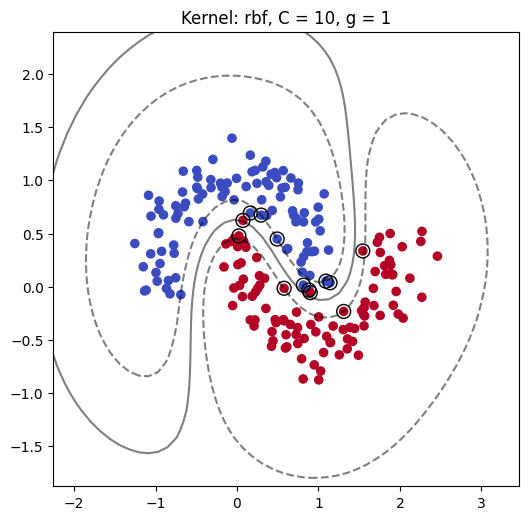

In [ ]:
svm_boundary_plotter(x_df,y_df,1,2,3,[10],[1],['rbf'])